In [372]:
import matplotlib
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
% matplotlib inline

**Part 1: Exploratory Data Analysis**

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [2]:
df_logins = pd.read_json('logins.json')

In [3]:
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df_logins.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


There are 93,142 entries and lets sort the login_time and use it as index

In [5]:
df_logins = df_logins.sort_values('login_time').set_index('login_time')

In [6]:
df_logins['freq'] = 1
df_logins = df_logins.resample('15T').sum().fillna(0)

In [7]:
df_logins.head()

,freq
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


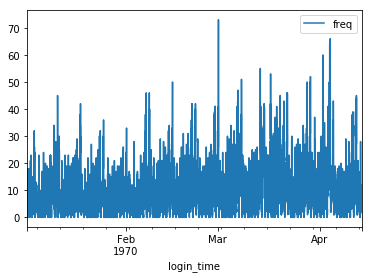

In [8]:
df_logins.plot()

Let's look at the first 7 days.

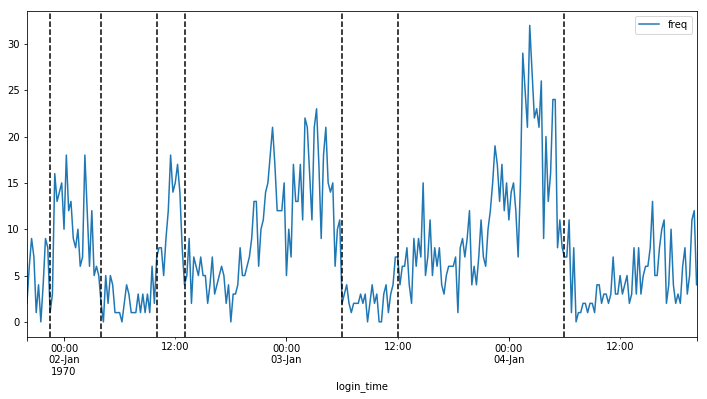

In [41]:
ax=df_logins[0:290].plot(figsize=(12,6))
hrposition = [pd.to_datetime('1970-01-01 22:30'), pd.to_datetime('1970-01-02 04:00'),
            pd.to_datetime('1970-01-02 10:00'), pd.to_datetime('1970-01-02 13:00'),
            pd.to_datetime('1970-01-03 06:00'),pd.to_datetime('1970-01-03 12:00'),
            pd.to_datetime('1970-01-04 06:00')]
for hr in hrposition:
    ax.axvline(x=hr, color='k', linestyle='--')

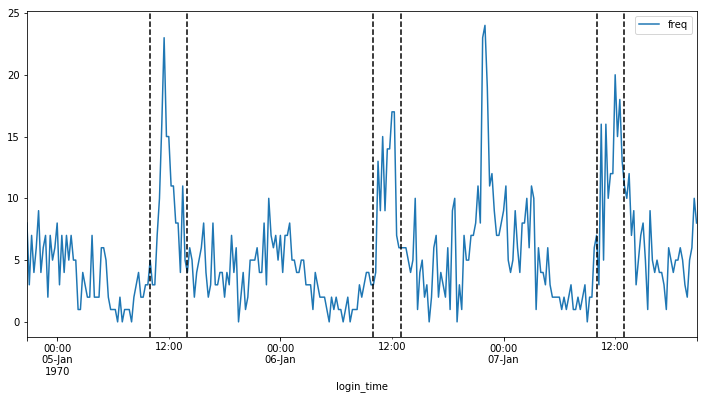

In [53]:
ax=df_logins[291:580].plot(figsize=(12,6))
hrposition = [pd.to_datetime('1970-01-05 10:00'), pd.to_datetime('1970-01-05 14:00'),
            pd.to_datetime('1970-01-06 10:00'), pd.to_datetime('1970-01-06 13:00'),
            pd.to_datetime('1970-01-07 10:00'),pd.to_datetime('1970-01-07 13:00')]
for hr in hrposition:
    ax.axvline(x=hr, color='k', linestyle='--')

Just from looking at the plot examples, there are more logins from ~11 pm to 5 am in the morning and around 10 am to 1 pm.

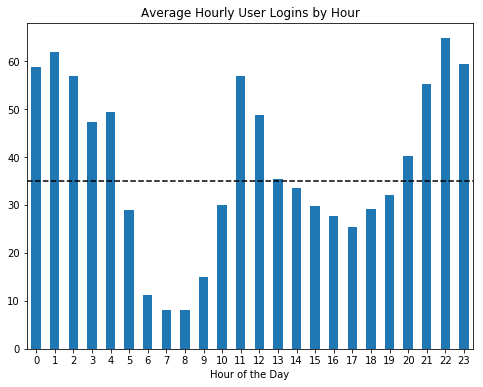

In [62]:
df_hour = df_logins.resample('1H').sum()
df_hour['hour'] = df_hour.index.hour
df_hour.groupby('hour').mean().plot(kind='bar',figsize=(8,6), legend=False)
plt.axhline(y=35, xmin=0, xmax=23, hold =None, color='k',linestyle='--')
plt.title('Average Hourly User Logins by Hour')
plt.xlabel('Hour of the Day')
plt.xticks(range(0,24), rotation=0)
plt.show()

The plot above also shows there are more users between 8 pm and 4 am and between 11 am and 1 pm.

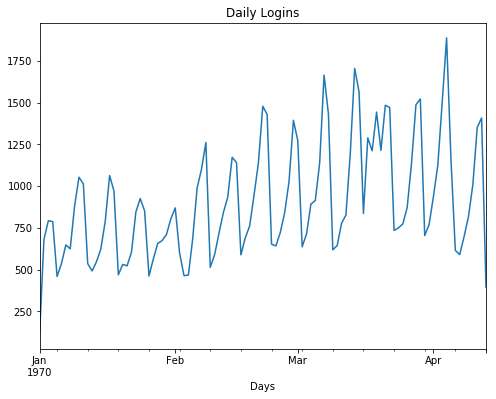

In [72]:
df_day=df_logins.resample('1D').sum()
df_day.plot(figsize=(8,6),legend=False)
plt.title("Daily Logins")
plt.xlabel('Days')
plt.show()

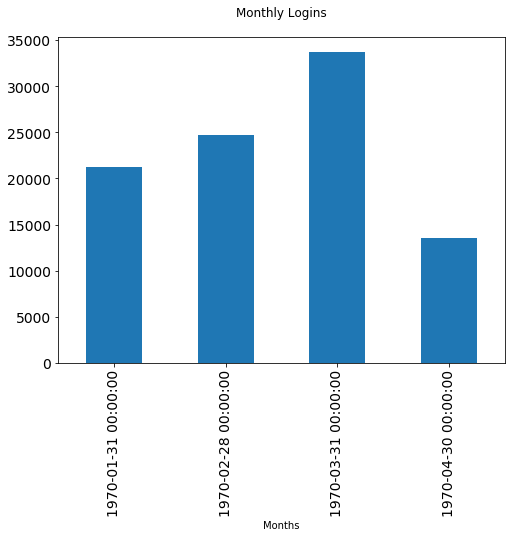

In [438]:
df_month=df_logins.resample('M').sum()
df_month.plot(kind='bar',figsize=(8,6),legend=False)
plt.title("Monthly Logins")
plt.xlabel('Months')
plt.show()

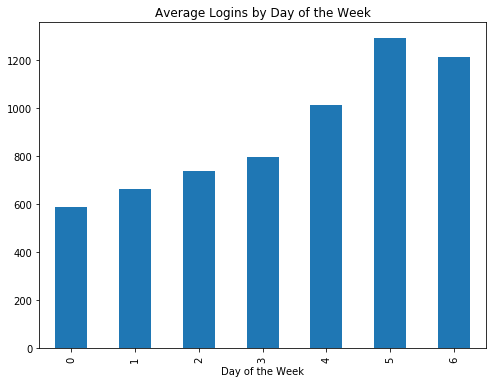

In [76]:
df_day['dayofweek'] = df_day.index.dayofweek
ax = df_day.groupby('dayofweek')['freq'].mean().plot(kind='bar',figsize=(8,6), legend=False)
plt.title('Average Logins by Day of the Week')
plt.xlabel('Day of the Week')
plt.show()

**2. Experiment and metrics design**

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

*1. If the toll is the main barrier between the drivers in the two cities, reimbursing the toll fee will show drivers working in both cities. A key measure of success would be to see the number of drivers from Gotham working in Metropolis and the number of drivers from Metropolis working in Gotham after the start of reimbursing toll fees.*

*2. We measure the number of drivers from Gotham working in Metropolis and viceversa while the toll fee is in place. The information given shows that there would be only few drivers, if any. Then we measure number of drivers from Gotham working in Metropolis and viceversa after notifying that toll fees would be reimbursed. This can also be done in parallel, offering reimbursement to a select group of partners. We can then use statistical measures ( t-test - before/after toll fee reimbursement or reimbursed group vs non-reimbursed group) to see if there is statistically significant change (p-value) in the number of drivers from across the bridge. *

*3. It is possible that Metropolis drivers might not drive to Gotham after a long day in their city.Similarly, some drivers might prefer to rest during slow hours (and hence increase driver-to-rider ratio) so that they can work during more active  hours in the city. I would expect a dynamic change in hourly concentration of drivers who want to work in both cities.*

**3. Rider Retention Predictive Modeling**

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

In [442]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

List the attribute names

In [443]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

Look at the total size of the data set and the number of missing values for each column

In [444]:
df.shape

(50000, 12)

In [445]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [446]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

There number of missing values for the attributes avg_rating_by_driver, avg_rating_of_driver, and phone is 201, 8122, and 396 respectively.

In [447]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(-999)
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(-999)
df['phone'] = df['phone'].fillna('unknown')

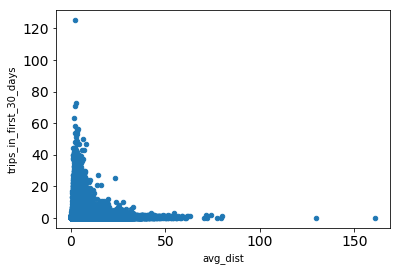

In [448]:
df.plot(x='avg_dist', y ='trips_in_first_30_days', kind='scatter')

*the scatter plot shows a skewed non-linear relationship between trips in first 30 days and average distance. For average distance of more than 25, the number of trips in the first 30 days is less than 10.*

In [449]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [450]:
df[['signup_date','last_trip_date']].head()

,signup_date,last_trip_date
0,2014-01-25,2014-06-17
1,2014-01-29,2014-05-05
2,2014-01-06,2014-01-07
3,2014-01-10,2014-06-29
4,2014-01-27,2014-03-15


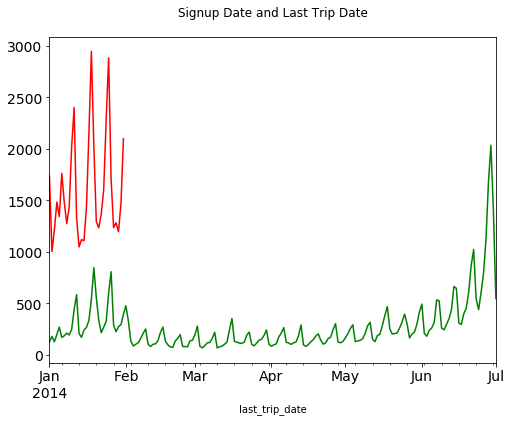

In [452]:
df.groupby('signup_date').size().plot(figsize=(8,6), color = 'r')
df.groupby('last_trip_date').size().plot(figsize=(8,6), color = 'g')
plt.title('Signup Date and Last Trip Date')
plt.show()

In [392]:
df['last_trip_date'].sort_values(ascending=False).head(2)

45357   2014-07-01
22735   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

All the signups were in January and the last trip date is July 01, 2014. Therefore, retained users are those who had a trip after May 31, 2014.

In [453]:
df['retained_users'] = (df.last_trip_date > '2014-05-31')

In [454]:
df['retained_users'].head(3)

0     True
1    False
2    False
Name: retained_users, dtype: bool

In [455]:
retained_ratio = df.retained_users.sum() / df.shape[0]
retained_ratio

0.37608000000000003

37.6% of the applicants are considered as retained on July 01, 2014

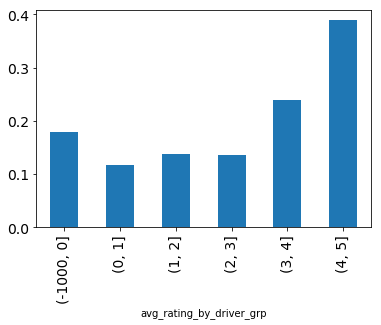

In [396]:
bins = [-1000,0,1,2,3,4,5]
df['avg_rating_by_driver_grp'] = pd.cut(df['avg_rating_by_driver'], bins=bins)
df.groupby('avg_rating_by_driver_grp')['retained_users'].mean().plot(kind='bar')

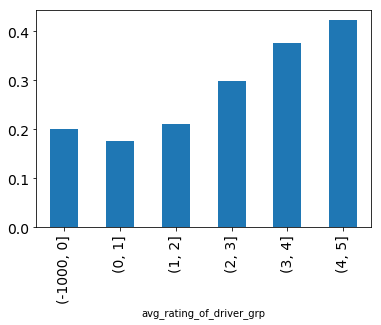

In [397]:
bins = [-1000,0,1,2,3,4,5]
df['avg_rating_of_driver_grp'] = pd.cut(df['avg_rating_of_driver'], bins=bins)
df.groupby('avg_rating_of_driver_grp')['retained_users'].mean().plot(kind='bar')

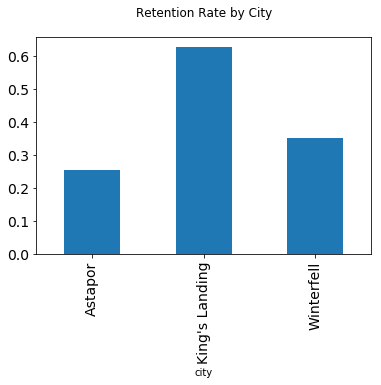

In [398]:
df.groupby('city')['retained_users'].mean().plot(kind='bar')
plt.title("Retention Rate by City")
plt.show()

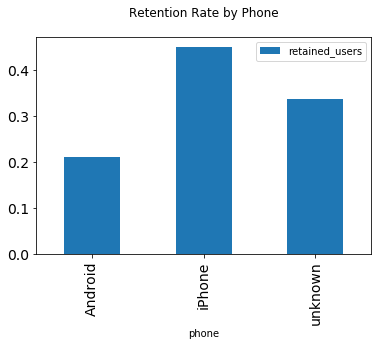

In [399]:
df[['retained_users', 'phone']].groupby('phone').mean().plot(kind='bar')
plt.title("Retention Rate by Phone")
plt.show()

In [400]:
#df['avg_surge'].value_counts().sort_index()

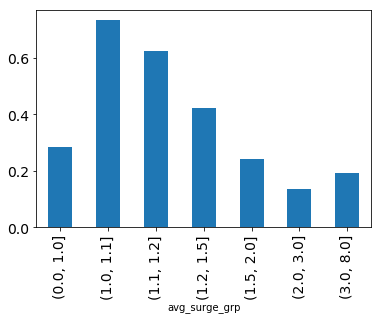

In [401]:
bins = [0,1,1.1,1.2,1.5,2,3,8]
df['avg_surge_grp'] = pd.cut(df['avg_surge'], bins=bins)
df.groupby('avg_surge_grp')['retained_users'].mean().plot(kind='bar')

In [402]:
#df['surge_pct'].value_counts().sort_index()

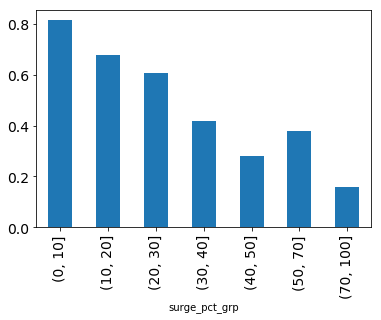

In [403]:
bins = [0,10,20,30,40,50,70,100]
df['surge_pct_grp'] = pd.cut(df['surge_pct'], bins=bins)
df.groupby('surge_pct_grp')['retained_users'].mean().plot(kind='bar')

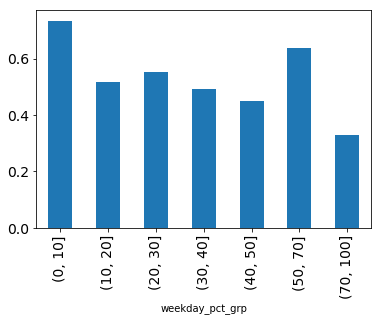

In [404]:
bins = [0,10,20,30,40,50,70,100]
df['weekday_pct_grp'] = pd.cut(df['weekday_pct'], bins=bins)
df.groupby('weekday_pct_grp')['retained_users'].mean().plot(kind='bar')

**Predictive Model**

We can use logistic regression to predict retention/non-retention of riders.We can also use other algorithms such as random forest which have proven to have good results with binary classification. 

In [405]:
categ_attributes = ['avg_rating_by_driver_grp','avg_rating_of_driver_grp','avg_surge_grp','city',
                    'phone','surge_pct_grp','ultimate_black_user','weekday_pct_grp']

In [406]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_users,avg_rating_by_driver_grp,avg_rating_of_driver_grp,avg_surge_grp,surge_pct_grp,weekday_pct_grp
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True,"(4, 5]","(4, 5]","(1.0, 1.1]","(10, 20]","(40, 50]"
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False,"(4, 5]","(4, 5]","(0.0, 1.0]",NaN,"(40, 50]"
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False,"(4, 5]","(4, 5]","(0.0, 1.0]",NaN,"(70, 100]"
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True,"(4, 5]","(4, 5]","(1.1, 1.2]","(10, 20]","(70, 100]"
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False,"(4, 5]","(4, 5]","(1.1, 1.2]","(10, 20]","(70, 100]"


In [407]:
#convert "Yes"/"No" to "1"/"0" for manipulation by LogisticRegression
df = df.replace({"retained_users":[True,False]},{"retained_users":["1","0"]})

In [408]:
df.drop(['avg_rating_by_driver','avg_rating_of_driver','avg_surge',
                    'surge_pct','weekday_pct','last_trip_date','signup_date'], axis = 1, inplace = True)

In [409]:
df.shape

(50000, 11)

In [410]:
df = pd.get_dummies(df, prefix=categ_attributes, columns=categ_attributes)
df.shape

(50000, 44)

In [411]:
df_features = list(df.columns)
df_features.remove('retained_users')

In [422]:
from sklearn.model_selection import train_test_split
X = df[df_features].values
y = (df['retained_users'].values=='1')*1
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [423]:
y

array([1, 0, 0, ..., 0, 0, 0])

In [424]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

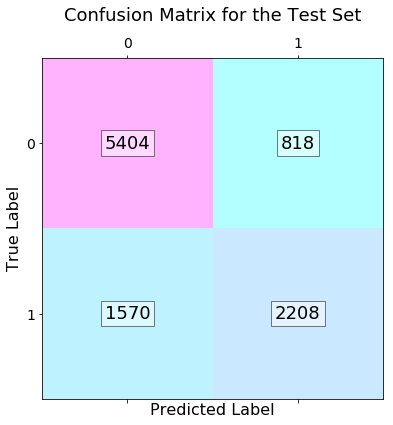

In [425]:
from sklearn.metrics import confusion_matrix
from matplotlib import rcParams
confmat_test = confusion_matrix(ytest, clf.predict(Xtest))
rcParams['axes.titlepad'] = 20 
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confmat_test, cmap=plt.cm.cool, alpha=0.3)
for i in range(confmat_test.shape[0]):
    for j in range(confmat_test.shape[1]):
        ax.text(x=j, y=i, s=confmat_test[i, j], va='center', ha='center',fontsize=18,bbox=dict(facecolor='white', alpha=0.5))
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.xlabel('Predicted Label',size=16)
plt.ylabel('True Label',size=16)
plt.title('Confusion Matrix for the Test Set',size=18)
plt.tight_layout()
plt.show()

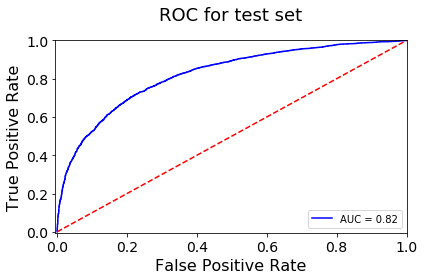

In [439]:

from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(ytest, clf.predict_proba(Xtest)[:, 1])
auc = roc_auc_score(ytest, clf.predict_proba(Xtest)[:, 1])

plt.title('ROC for test set',size=18)
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% auc)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
rcParams['axes.titlepad'] = 20 
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.005,1.0])
plt.ylim([-0.005,1.0])
plt.ylabel('True Positive Rate',size=16)
plt.xlabel('False Positive Rate',size=16)
plt.tight_layout()
plt.show()

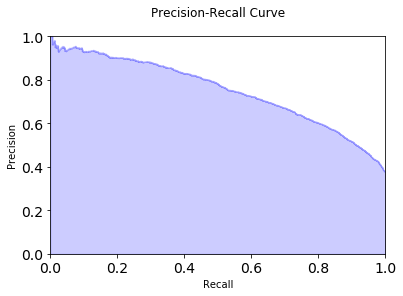

In [430]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(ytest, clf.predict_proba(Xtest)[:,1])

plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')

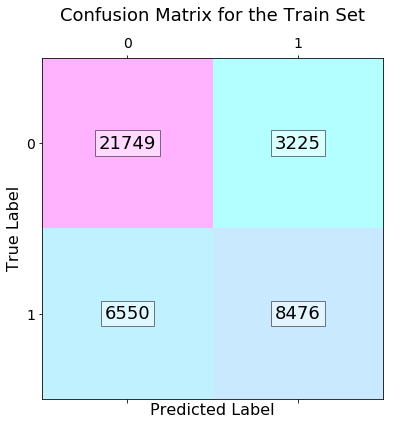

In [431]:
confmat_train = confusion_matrix(ytrain, clf.predict(Xtrain))
rcParams['axes.titlepad'] = 20 
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confmat_train, cmap=plt.cm.cool, alpha=0.3)
for i in range(confmat_train.shape[0]):
    for j in range(confmat_train.shape[1]):
        ax.text(x=j, y=i, s=confmat_train[i, j], va='center', ha='center',fontsize=18,bbox=dict(facecolor='white', alpha=0.5))
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.xlabel('Predicted Label',size=16)
plt.ylabel('True Label',size=16)
plt.title('Confusion Matrix for the Train Set',size=18)
plt.tight_layout()
plt.show()

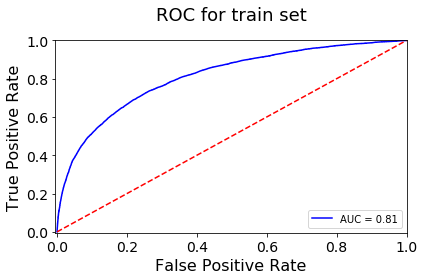

In [434]:
fpr, tpr, _ = roc_curve(ytrain, clf.predict_proba(Xtrain)[:, 1])
auc = roc_auc_score(ytrain, clf.predict_proba(Xtrain)[:, 1])

plt.title('ROC for train set',size=18)
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% auc)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
rcParams['axes.titlepad'] = 20 
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.005,1.0])
plt.ylim([-0.005,1.0])
plt.ylabel('True Positive Rate',size=16)
plt.xlabel('False Positive Rate',size=16)
plt.tight_layout()
plt.show()

In [440]:
training_accuracy = clf.score(Xtrain, ytrain)
test_accuracy = clf.score(Xtest, ytest)

In [441]:
print(training_accuracy, test_accuracy)

0.755625 0.7612


The accuracy for the training and test sets is 75.5% and 76.1% respectively which is possibly acceptable for the problem. The accuracy also shows there is no overfitting of the training set.

In [457]:
coefficients = pd.concat([pd.DataFrame(df_features),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coefficients.columns = ['attributes','coefficient']
coefficients['abs_coefficient'] = coefficients['coefficient'].abs()
coefficients.sort_values(by='abs_coefficient', ascending=False).head(20)

,attributes,coefficient,abs_coefficient
27,"surge_pct_grp_(0, 10]",1.866788,1.866788
41,"weekday_pct_grp_(50, 70]",1.271279,1.271279
38,"weekday_pct_grp_(20, 30]",1.209176,1.209176
28,"surge_pct_grp_(10, 20]",1.053816,1.053816
37,"weekday_pct_grp_(10, 20]",1.017494,1.017494
21,city_Astapor,-0.997626,0.997626
39,"weekday_pct_grp_(30, 40]",0.984920,0.984920
36,"weekday_pct_grp_(0, 10]",0.972306,0.972306
40,"weekday_pct_grp_(40, 50]",0.878882,0.878882
22,city_King's Landing,0.747319,0.747319


The feature importance shows the significance of surge, weekdays, and city. Surge is the most important and it is recommended to revise the surge rate to retain customers. A thorough study of why there is low retention in Astapor is also recommended. The rating of driver or by driver also shows its importance in customer retention and it is recommended to ask riders their experience and if they plan to use Ultimate in the future.